**DỰ BÁO SỐ LƯỢNG TIÊU THỤ NƯỚC GIẢI KHÁT CỦA MỘT CHUỖI CỬA HÀNG TẠI HY LẠP**

In [ ]:
#import thư viện
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math

# **IMPORT DỮ LIỆU VÀO GOOGLE COLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/MindX - DA/Project 3/Dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/MindX - DA/Project 3/Dataset/test.csv')

In [ ]:
df_train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691


```
Dữ liệu gồm 12 cột:
1. id: id nhập liệu
2. date: ngày nhập dữ liệu mỗi tháng
3. city: thành phố đặt cửa hàng
4. lat: vĩ độ của thành phố
5. long: kinh độ của thành phố
6. pop: dân số của thành phố
7. shop: cửa hàng
8. brand: nhãn hàng
9. container: loại bao bì của sản phẩm
10. capacity: dung tích sản phẩm
11. price: giá sản phẩm
12. quantity: số lượng bán ra trong tháng
```


# **KIỂM TRA VÀ LÀM SẠCH DỮ LIỆU**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1080 non-null   int64  
 1   date       1080 non-null   object 
 2   city       1080 non-null   object 
 3   lat        1072 non-null   float64
 4   long       1067 non-null   float64
 5   pop        1080 non-null   int64  
 6   shop       1080 non-null   object 
 7   brand      1080 non-null   object 
 8   container  1077 non-null   object 
 9   capacity   1076 non-null   object 
 10  price      1080 non-null   float64
 11  quantity   1080 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 101.4+ KB


In [ ]:
#bỏ các cột không cần thiết
df_train = df_train.dropna(axis = 0, how = 'all')
df_train = df_train.drop(['lat','long','id','pop'], axis = 1)

df_test = df_test.drop(['lat','long','id','pop'], axis = 1)

In [ ]:
#check dòng lặp
duplicate = df_train[df_train.duplicated()]
duplicate

,date,city,shop,brand,container,capacity,price,quantity


In [ ]:
duplicate = df_test[df_test.duplicated()]
duplicate

,date,city,shop,brand,container,capacity,price,quantity


In [ ]:
#check null
df_train.isnull().sum()

date          0
city          0
shop          0
brand         0
container    16
capacity     15
price         0
quantity      0
dtype: int64

In [ ]:
df_test.isnull().sum()

date         0
city         0
shop         0
brand        0
container    3
capacity     4
price        0
quantity     0
dtype: int64

Chỉ thấy giá trị null tại 2 cột 'container' và 'capacity'

In [ ]:
#xem lại các giá trị null 
df_train[df_train.isna().any(axis=1)]

,date,city,shop,brand,container,capacity,price,quantity
16,31/01/12,Irakleion,shop_2,orange-power,NaN,330ml,0.23,54780.0
577,31/07/12,Patra,shop_6,lemon-boost,NaN,1.5lt,2.16,33800.0
740,30/09/12,Irakleion,shop_2,orange-power,NaN,500ml,0.64,54164.0
1051,31/12/12,Larisa,shop_5,kinder-cola,NaN,500ml,1.40,7497.0
1553,30/06/13,Patra,shop_6,kinder-cola,glass,NaN,1.46,25634.0
1694,31/07/13,Larisa,shop_5,gazoza,NaN,330ml,0.36,37603.0
1847,30/09/13,Thessaloniki,shop_4,gazoza,plastic,NaN,0.93,42320.0
2584,31/05/14,Athens,shop_3,lemon-boost,glass,NaN,0.61,27136.0
3040,31/10/14,Larisa,shop_5,adult-cola,can,NaN,0.69,21225.0
3246,31/01/15,Athens,shop_1,gazoza,glass,NaN,0.51,46809.0


In [ ]:
df_test[df_test.isna().any(axis=1)]

,date,city,shop,brand,container,capacity,price,quantity
368,31/05/18,Athens,shop_1,lemon-boost,NaN,500ml,1.11,17232
421,31/05/18,Athens,shop_3,lemon-boost,can,NaN,0.66,16309
778,30/09/18,Larisa,shop_5,adult-cola,glass,NaN,1.42,13095
873,31/10/18,Larisa,shop_5,kinder-cola,NaN,500ml,1.52,10031
1017,31/12/18,Patra,shop_6,adult-cola,NaN,330ml,0.56,53881
1034,31/12/18,Thessaloniki,shop_4,gazoza,can,NaN,0.39,54365
1045,31/12/18,Athens,shop_3,gazoza,glass,NaN,0.57,33174


In [ ]:
#check mối quan hệ giữa 2 cột null
type_of_goods = df_train.groupby(['container', 'capacity'],as_index=False).agg(total_quatity = ('quantity','sum'))
type_of_goods

,container,capacity,total_quatity
0,can,330ml,76788061.0
1,glass,500ml,64276999.0
2,plastic,1.5lt,48546186.0


Nhận thấy từng loại bao bì tương ứng với từng loại dung tích --> fill null theo mối quan hệ này

In [ ]:
#fill null
dict1 = {"330ml":"can", "500ml":"glass", "1.5lt":"plastic"}
dict2 = {"can":"330ml", "glass":"500ml", "plastic":"1.5lt"}

df_train['container'] = df_train['container'].fillna(df_train['capacity'].map(dict1))
df_test['container'] = df_test['container'].fillna(df_test['capacity'].map(dict1))

df_train['capacity'] = df_train['capacity'].fillna(df_train['container'].map(dict2))
df_test['capacity'] = df_test['capacity'].fillna(df_test['container'].map(dict2))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 6479
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6480 non-null   object 
 1   city       6480 non-null   object 
 2   shop       6480 non-null   object 
 3   brand      6480 non-null   object 
 4   container  6480 non-null   object 
 5   capacity   6480 non-null   object 
 6   price      6480 non-null   float64
 7   quantity   6480 non-null   float64
dtypes: float64(2), object(6)
memory usage: 455.6+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1080 non-null   object 
 1   city       1080 non-null   object 
 2   shop       1080 non-null   object 
 3   brand      1080 non-null   object 
 4   container  1080 non-null   object 
 5   capacity   1080 non-null   object 
 6   price      1080 non-null   float64
 7   quantity   1080 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 67.6+ KB


In [ ]:
#kiểm tra lại sau khi fill null
print(df_train.container.unique())
print(df_test.container.unique())

print(df_train.capacity.unique())
print(df_test.capacity.unique())

['glass' 'plastic' 'can']
['plastic' 'can' 'glass']
['500ml' '1.5lt' '330ml']
['1.5lt' '330ml' '500ml']


In [ ]:
#chuyển cột capacity thành dạng int với các giá trị số
df_train['capacity'] = df_train['capacity'].replace('1.5lt', '1500ml')
df_train['capacity'] = df_train['capacity'].map(lambda x: str(x)[:-2])
df_train['capacity'] = pd.to_numeric(df_train['capacity'])

df_test['capacity'] = df_test['capacity'].replace('1.5lt', '1500ml')
df_test['capacity'] = df_test['capacity'].map(lambda x: str(x)[:-2])
df_test['capacity'] = pd.to_numeric(df_test['capacity'])

In [ ]:
#đổi định dạng cột date thành dạng datetime
df_train['date'] = pd.to_datetime(df_train['date'], format='%d/%m/%y')
df_test['date'] = pd.to_datetime(df_test['date'], format='%d/%m/%y')

In [ ]:
#tạo thêm cột month và year
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year

df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year

In [ ]:
df_train

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2012-01-31,Athens,shop_1,kinder-cola,glass,500,0.96,13280.0,1,2012
1,2012-01-31,Athens,shop_1,kinder-cola,plastic,1500,2.86,6727.0,1,2012
2,2012-01-31,Athens,shop_1,kinder-cola,can,330,0.87,9848.0,1,2012
3,2012-01-31,Athens,shop_1,adult-cola,glass,500,1.00,20050.0,1,2012
4,2012-01-31,Athens,shop_1,adult-cola,can,330,0.39,25696.0,1,2012
...,...,...,...,...,...,...,...,...,...,...
6475,2017-12-31,Athens,shop_3,orange-power,plastic,1500,1.02,33201.0,12,2017
6476,2017-12-31,Larisa,shop_5,orange-power,can,330,0.47,46971.0,12,2017
6477,2017-12-31,Patra,shop_6,adult-cola,glass,500,1.02,47708.0,12,2017
6478,2017-12-31,Thessaloniki,shop_4,gazoza,plastic,1500,1.34,27115.0,12,2017


In [ ]:
df_test

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2018-01-31,Athens,shop_1,kinder-cola,plastic,1500,3.10,7056,1,2018
1,2018-01-31,Athens,shop_1,kinder-cola,can,330,0.85,12490,1,2018
2,2018-01-31,Athens,shop_1,adult-cola,glass,500,0.83,26640,1,2018
3,2018-01-31,Athens,shop_1,orange-power,glass,500,0.54,41892,1,2018
4,2018-01-31,Athens,shop_1,orange-power,plastic,1500,0.83,22923,1,2018
...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.52,13760,12,2018
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,2.18,16309,12,2018
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.85,24378,12,2018
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.17,20691,12,2018


In [ ]:
df_train.isnull().sum()

date         0
city         0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
month        0
year         0
dtype: int64

In [ ]:
df_test.isnull().sum()

date         0
city         0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
month        0
year         0
dtype: int64

Tập test và tập train không còn null

#**EDA**

In [ ]:
#gộp lại tập train và test để phân tích dữ liệu từ 2012 đến 2018
df = df_train.append(df_test)

<ipython-input-125-69c2958a20c4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [ ]:
df

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2012-01-31,Athens,shop_1,kinder-cola,glass,500,0.96,13280.0,1,2012
1,2012-01-31,Athens,shop_1,kinder-cola,plastic,1500,2.86,6727.0,1,2012
2,2012-01-31,Athens,shop_1,kinder-cola,can,330,0.87,9848.0,1,2012
3,2012-01-31,Athens,shop_1,adult-cola,glass,500,1.00,20050.0,1,2012
4,2012-01-31,Athens,shop_1,adult-cola,can,330,0.39,25696.0,1,2012
...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.52,13760.0,12,2018
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,2.18,16309.0,12,2018
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.85,24378.0,12,2018
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.17,20691.0,12,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7560 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7560 non-null   datetime64[ns]
 1   city       7560 non-null   object        
 2   shop       7560 non-null   object        
 3   brand      7560 non-null   object        
 4   container  7560 non-null   object        
 5   capacity   7560 non-null   int64         
 6   price      7560 non-null   float64       
 7   quantity   7560 non-null   float64       
 8   month      7560 non-null   int64         
 9   year       7560 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 649.7+ KB


In [ ]:
#xem phân bổ shop tại từng thành phố, mỗi shop bán sản phẩm của các nhãn hàng nào
pd.DataFrame(df.groupby(['city','shop','brand'], axis =0, as_index=True).sum()['quantity'])

<ipython-input-128-6ec9ae151b50>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df.groupby(['city','shop','brand'], axis =0, as_index=True).sum()['quantity'])


quantity
city         shop   brand                   
Athens       shop_1 adult-cola     5842061.0
                    gazoza         9574969.0
                    kinder-cola    3682152.0
                    lemon-boost    5262116.0
                    orange-power   8180867.0
             shop_3 adult-cola     4741280.0
                    gazoza         7620196.0
                    kinder-cola    2941626.0
                    lemon-boost    4224639.0
                    orange-power   6523139.0
Irakleion    shop_2 adult-cola     6977197.0
                    gazoza        11708275.0
                    kinder-cola    4442202.0
                    lemon-boost    6389049.0
                    orange-power   9597324.0
Larisa       shop_5 adult-cola     5426112.0
                    gazoza         8529438.0
                    kinder-cola    3307896.0
                    lemon-boost    4866825.0
                    orange-power   7460461.0
Patra        shop_6 adult-cola     9572902.0
                    gazoza        15826418.0
                    kinder-cola    6093588.0
                    lemon-boost    8520194.0
                    orange-power  12748440.0
Thessaloniki shop_4 adult-cola     7743243.0
                    gazoza        12556361.0
                    kinder-cola    4677758.0
                    lemon-boost    6944618.0
                    orange-power  10446821.0

**Biến động quantity qua từng năm**

In [ ]:
a = df.groupby('year')[['quantity']].sum().reset_index(drop = False)
a

,year,quantity
0,2012,32809949.0
1,2013,32257642.0
2,2014,31656808.0
3,2015,31642799.0
4,2016,31199662.0
5,2017,31151561.0
6,2018,31709746.0


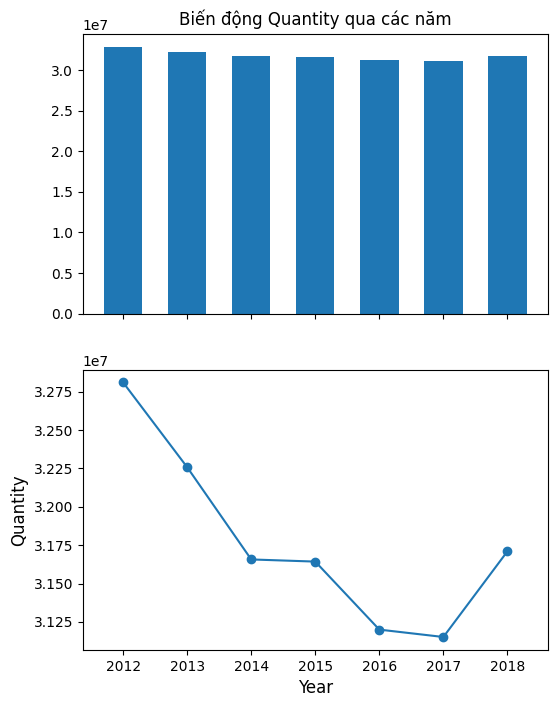

In [ ]:
plt.subplots(2, sharex=True, figsize = (6,8))
plt.xlabel("Year", fontsize=12)
plt.ylabel("Quantity", fontsize=12)

plt.subplot(2, 1, 1)
plt.bar(a.year.values, a.quantity.values, width = 0.6)
plt.title("Biến động Quantity qua các năm")

plt.subplot(2, 1, 2)
plt.plot(a['year'], a['quantity'], marker='o')

```
•	Lượng tổng tiêu thụ từ năm 2012 – 2018 không có nhiều biến động, ở khoảng mức 31 – 33 triệu sản phẩm mỗi năm.
•	Từ năm 2012 đến năm 2017 (tập train) lượng tổng tiêu thụ có xu hướng giảm; tuy nhiên đến năm 2018 (tập test) có xu hướng tăng lên. 
Do vậy có 1 nghi vấn rằng khi xây dựng mô hình trên tập train để dự báo tập test thì kết quả predict có thể sẽ thấp hơn dữ liệu thực tế.
```

Text(0.5, 1.0, 'Tổng số lượng bán của chuỗi cửa hàng qua các tháng từ năm 2012 - 2018')

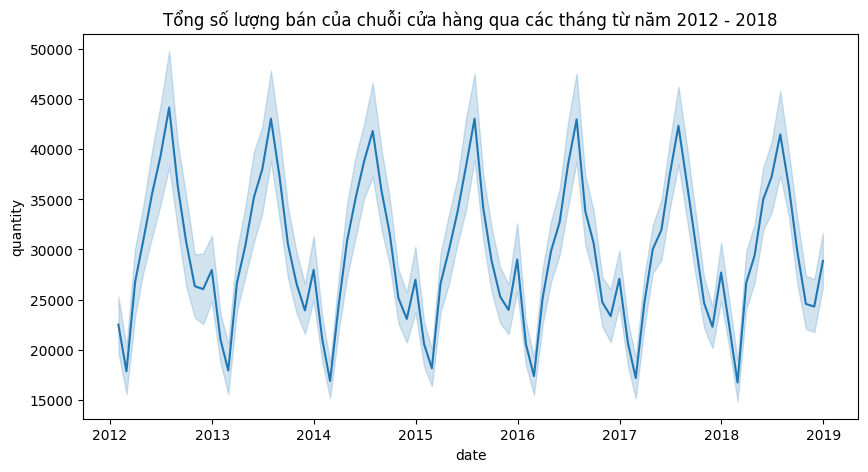

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.lineplot(x = df.date, y = df.quantity)
plt.title("Tổng số lượng bán của chuỗi cửa hàng qua các tháng từ năm 2012 - 2018")

```
•	Số lượng bán ra có tính chu kỳ, bán nhiều nhất vào mùa hè tại Hy Lạp (khoảng tháng 7-8)
•	Lượng bán ra từng tháng theo các năm không có nhiều biến động
```

In [ ]:
#lượng bán của từng thành phố qua các năm
total_quantity_by_city = df.groupby(['city','year'],as_index=False).agg(quantity = ('quantity','sum'))
total_quantity_by_city

,city,year,quantity
0,Athens,2012,8715704.0
1,Athens,2013,8448499.0
2,Athens,2014,8358196.0
3,Athens,2015,8192978.0
4,Athens,2016,8407319.0
5,Athens,2017,8001270.0
6,Athens,2018,8469079.0
7,Irakleion,2012,5853496.0
8,Irakleion,2013,5591771.0
9,Irakleion,2014,5440315.0


In [ ]:
#lượng bán của từng thành phố và cửa hàng qua các năm
total_quantity_by_city_shop = df.groupby(['year','city','shop'],as_index=False).agg(quantity = ('quantity','sum'))
total_quantity_by_city_shop

,year,city,shop,quantity
0,2012,Athens,shop_1,4837946.0
1,2012,Athens,shop_3,3877758.0
2,2012,Irakleion,shop_2,5853496.0
3,2012,Larisa,shop_5,4338428.0
4,2012,Patra,shop_6,7907185.0
5,2012,Thessaloniki,shop_4,5995136.0
6,2013,Athens,shop_1,4756358.0
7,2013,Athens,shop_3,3692141.0
8,2013,Irakleion,shop_2,5591771.0
9,2013,Larisa,shop_5,4300131.0


In [ ]:
def quantity_city_shop(year):
  fig, ax = plt.subplots(figsize=(6,5))
  width = 0.4
  if year == 2012:
    i = 0
  else:
    i = (year -2012)*6
  ax.bar(total_quantity_by_city_shop.city.values[i], total_quantity_by_city_shop.quantity.values[i], width, color = "orchid", label = total_quantity_by_city_shop.shop.values[i])
  ax.bar(total_quantity_by_city_shop.city.values[i + 1], total_quantity_by_city_shop.quantity.values[i+ 1], width, bottom = total_quantity_by_city_shop.quantity.values[i], color = "thistle", label = total_quantity_by_city_shop.shop.values[i+ 1])
  ax.bar(total_quantity_by_city_shop.city.values[i + 2], total_quantity_by_city_shop.quantity.values[i+ 2], width, color = "palevioletred", label = total_quantity_by_city_shop.shop.values[i+ 2])
  ax.bar(total_quantity_by_city_shop.city.values[i + 3], total_quantity_by_city_shop.quantity.values[i+ 3], width, color = "crimson", label = total_quantity_by_city_shop.shop.values[i+ 3])
  ax.bar(total_quantity_by_city_shop.city.values[i + 4], total_quantity_by_city_shop.quantity.values[i+ 4], width, color = "silver", label = total_quantity_by_city_shop.shop.values[i+ 4])
  ax.bar(total_quantity_by_city_shop.city.values[i + 5], total_quantity_by_city_shop.quantity.values[i+ 5], width, color = "Pink", label = total_quantity_by_city_shop.shop.values[i+ 5])
  ax.set_title('Quantity theo city và shop năm '+ str(year))
  plt.legend(loc="center right", bbox_to_anchor=(0.8, 0, 0.6, 1), prop={'size': 12})
  plt.show()

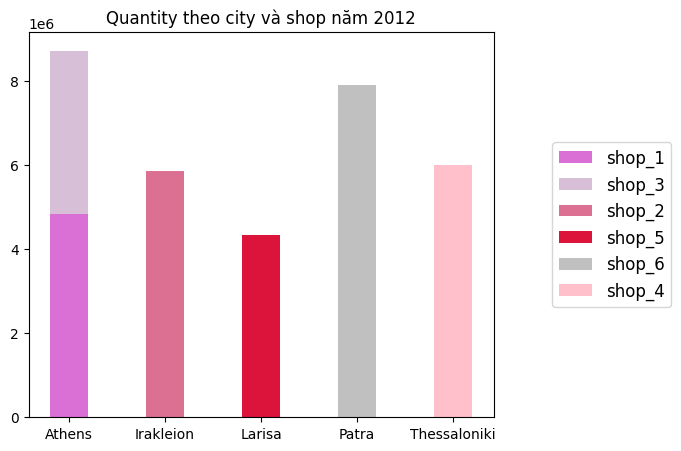

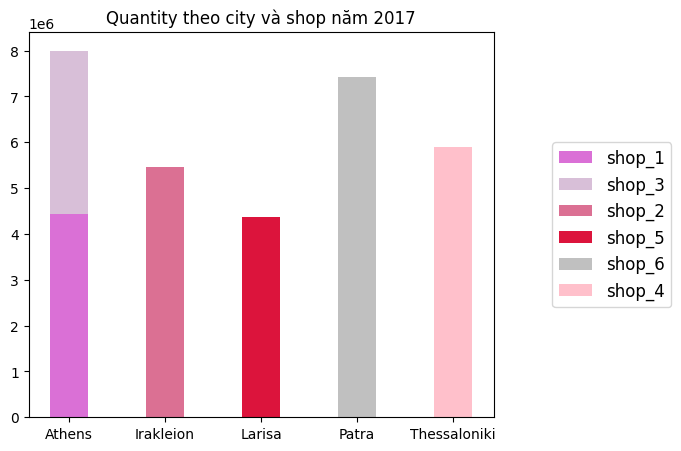

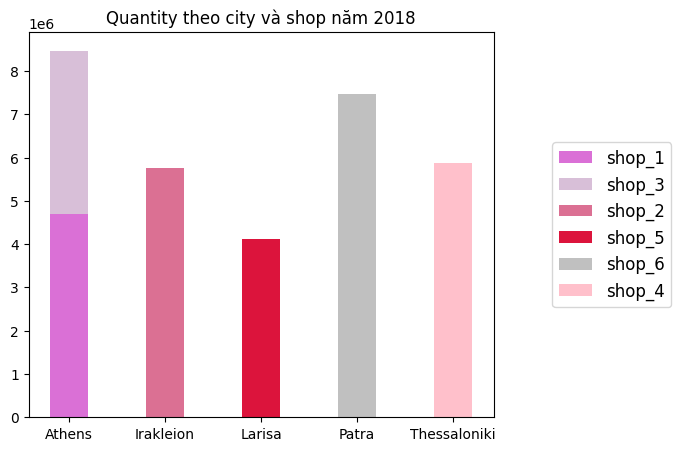

In [ ]:
#biểu đồ lượng bán của từng thành phố và cửa hàng theo các năm
quantity_city_shop(2012)
quantity_city_shop(2017)
quantity_city_shop(2018)

```
•	Lượng bán ra của các shop tại các thành phố qua các năm cũng không có nhiều biến động.
•	Shop bán tốt nhất: Shop 6; shop bán kém nhất: Shop 3.
•	Thành phố bán tốt nhất: Athens; thành phố bán kém nhất: Larisa.
```

**Biến động quantity và giá của từng loại qua các năm**

In [ ]:
adult_cola = df[df['brand'] == 'adult-cola'].reset_index(drop=True)

gazoza = df[df['brand'] == 'gazoza'].reset_index(drop=True)

kinder_cola = df[df['brand'] == 'kinder-cola'].reset_index(drop=True)

lemon_boost = df[df['brand'] == 'lemon-boost'].reset_index(drop=True)

orange_power = df[df['brand'] == 'orange-power'].reset_index(drop=True)

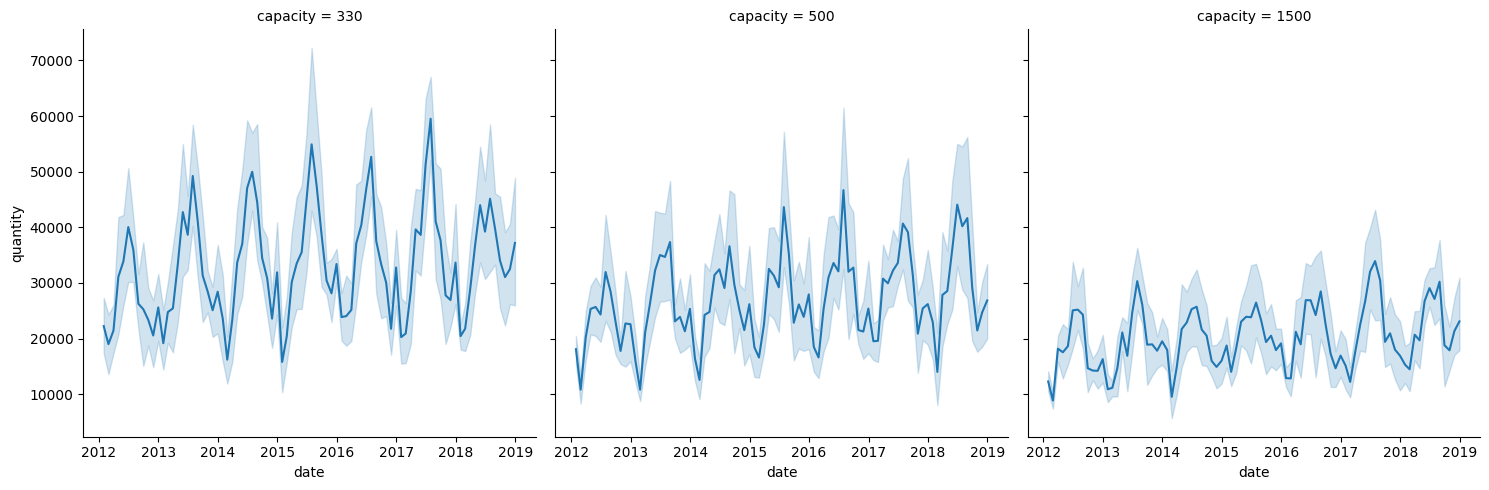

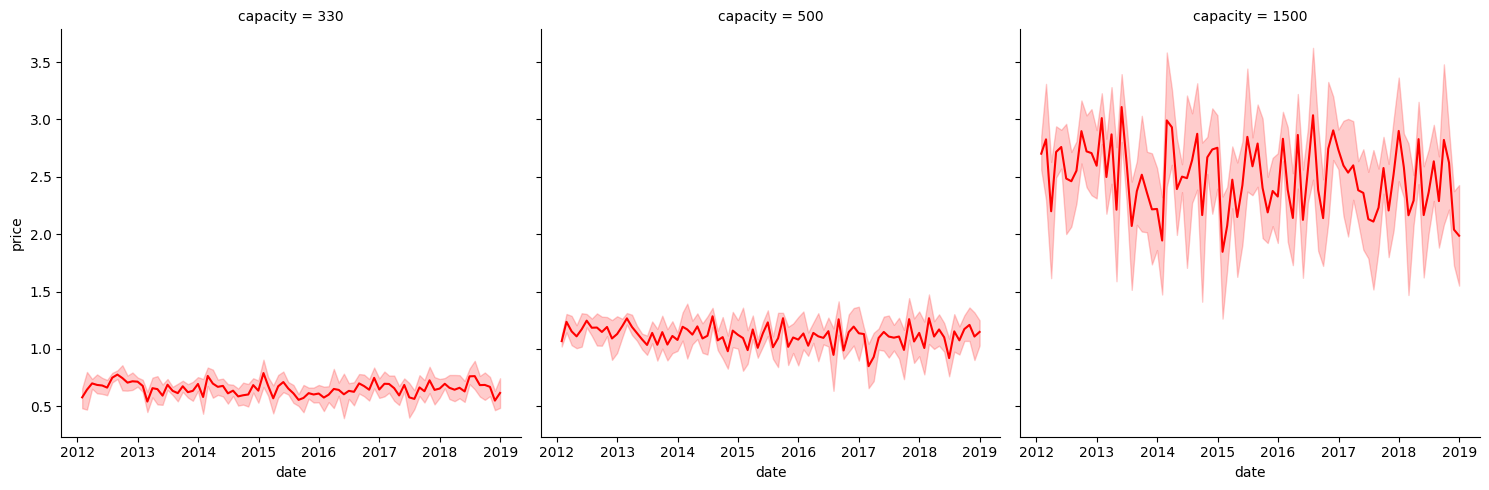

In [ ]:
#Sản lượng tiêu thụ và giá cả theo các dung tích của Adult Cola 2012-2018
ax1 = sns.relplot(data = adult_cola, x = 'date', y = 'quantity', col = 'capacity', kind = 'line')
ax2 = sns.relplot(data = adult_cola, x = 'date', y = 'price', col = 'capacity', kind = 'line', color = 'red')

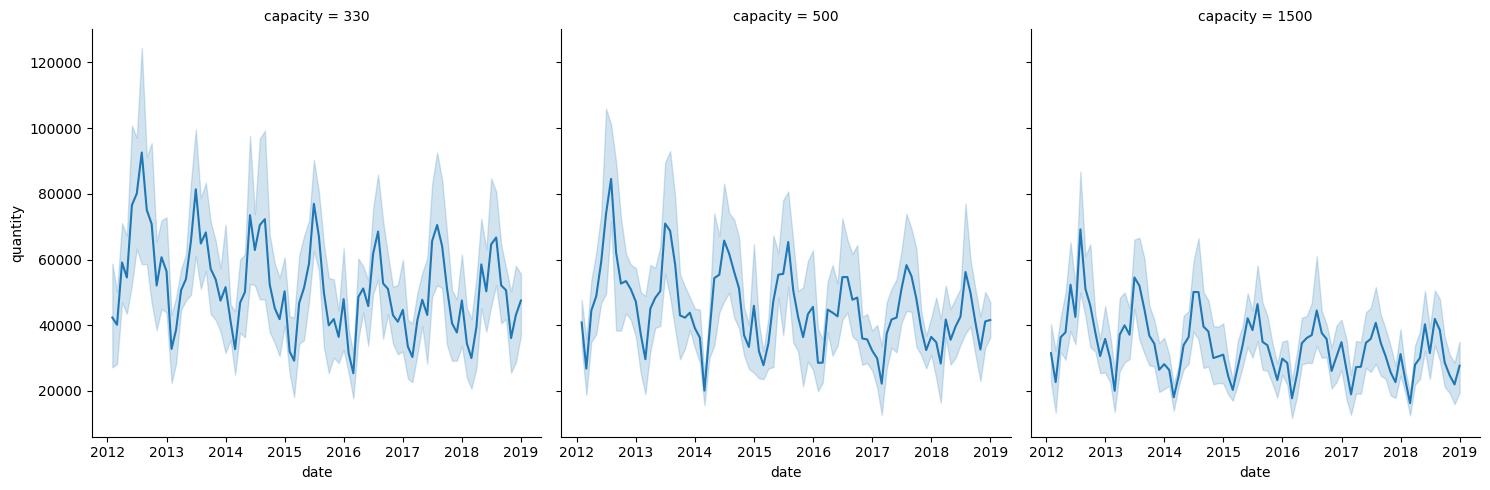

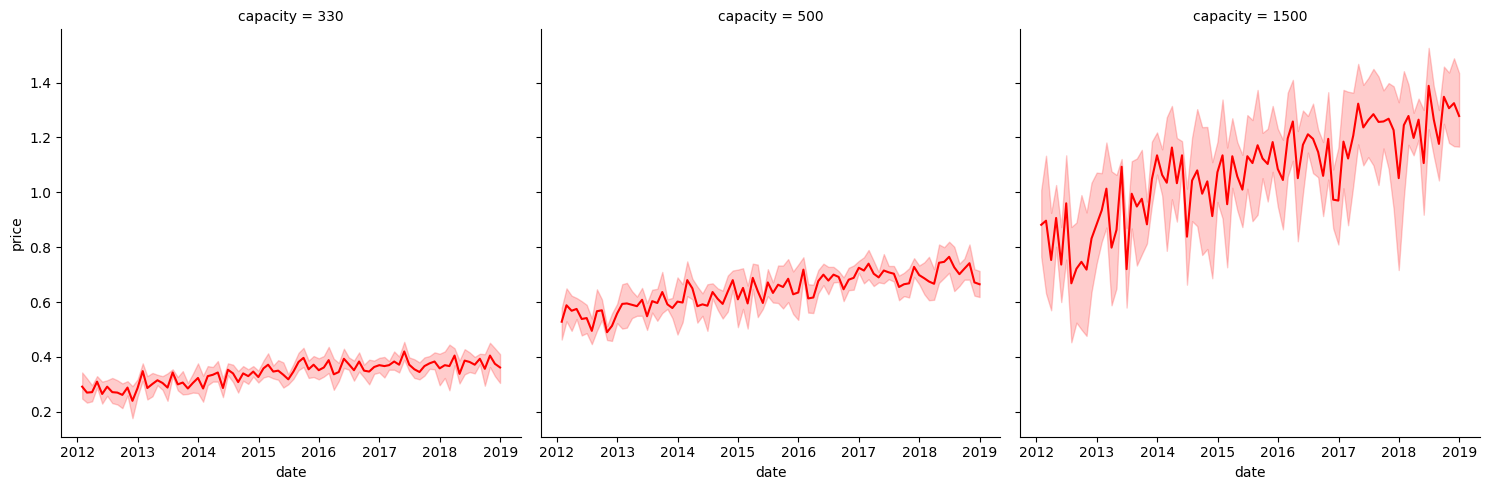

In [ ]:
#Sản lượng tiêu thụ và giá cả theo các dung tích của Gagoza 2012-2018
ax3 = sns.relplot(data = gazoza, x = 'date', y = 'quantity', col = 'capacity', kind = 'line')
ax4 = sns.relplot(data = gazoza, x = 'date', y = 'price', col = 'capacity', kind = 'line', color = 'red')

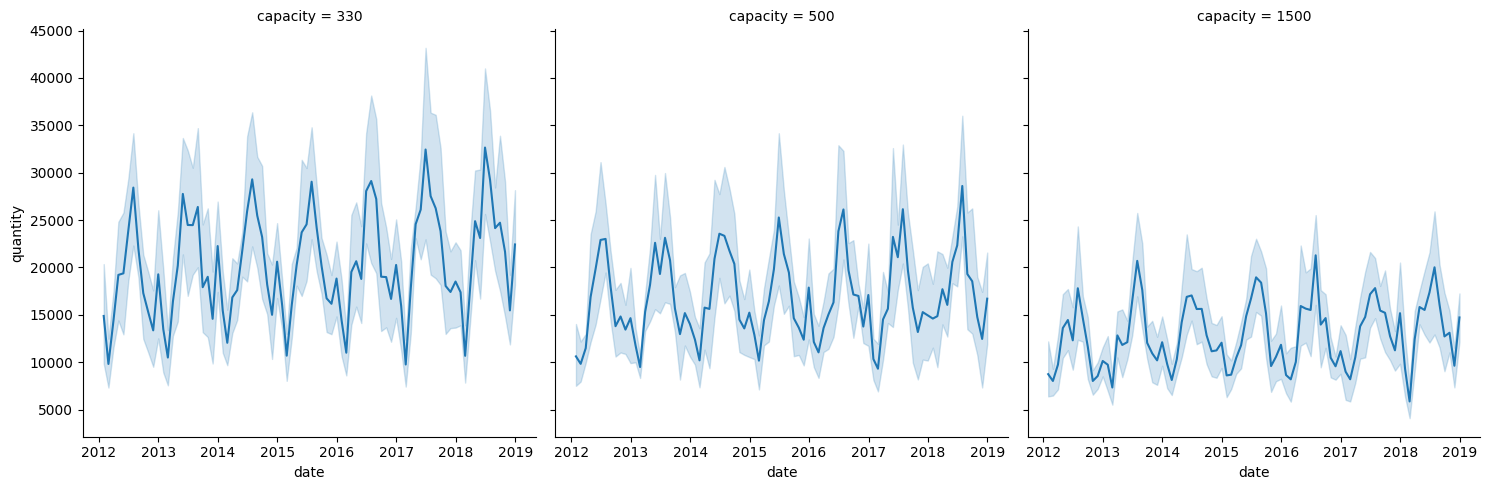

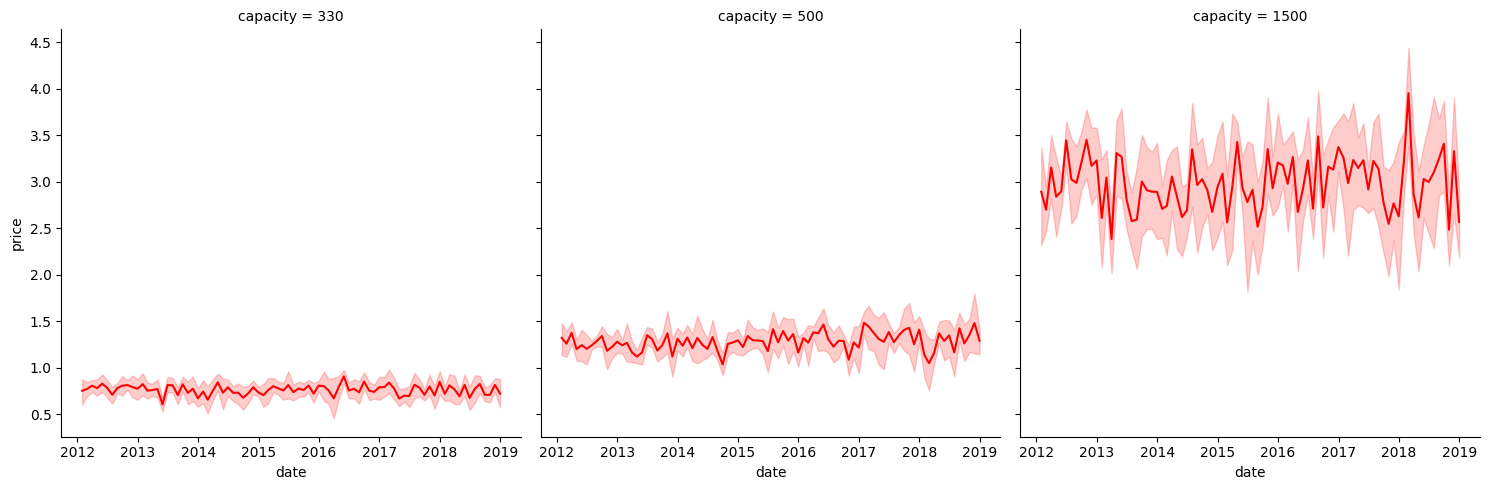

In [ ]:
#Sản lượng tiêu thụ và giá cả theo các dung tích của Kinder Cola 2012-2018
ax5 = sns.relplot(data = kinder_cola, x = 'date', y = 'quantity', col = 'capacity', kind = 'line')
ax6 = sns.relplot(data = kinder_cola, x = 'date', y = 'price', col = 'capacity', kind = 'line', color = 'red')

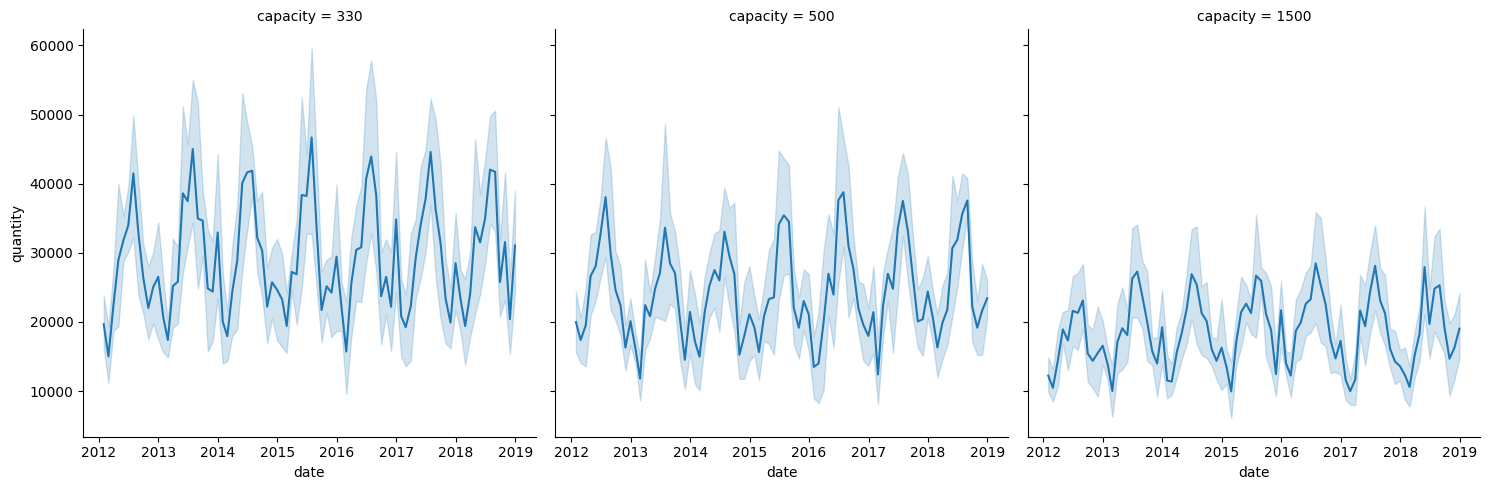

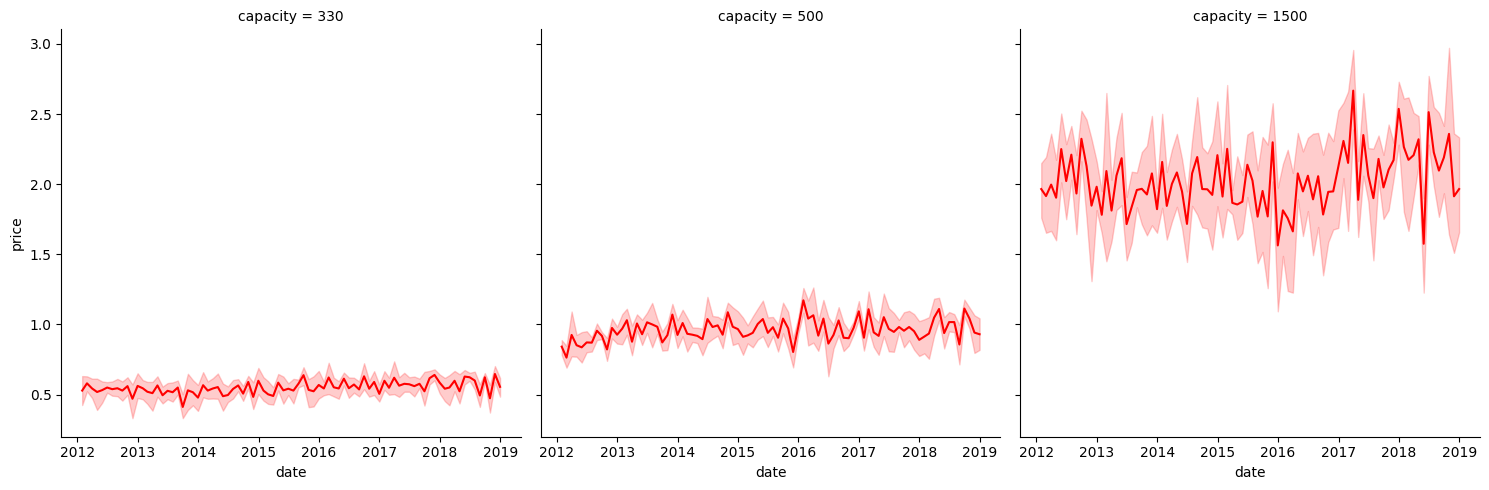

In [ ]:
#Sản lượng tiêu thụ và giá cả theo các dung tích của Lemon Boost 2012-2018
ax7 = sns.relplot(data = lemon_boost, x = 'date', y = 'quantity', col = 'capacity', kind = 'line')
ax8 = sns.relplot(data = lemon_boost, x = 'date', y = 'price', col = 'capacity', kind = 'line', color = 'red')

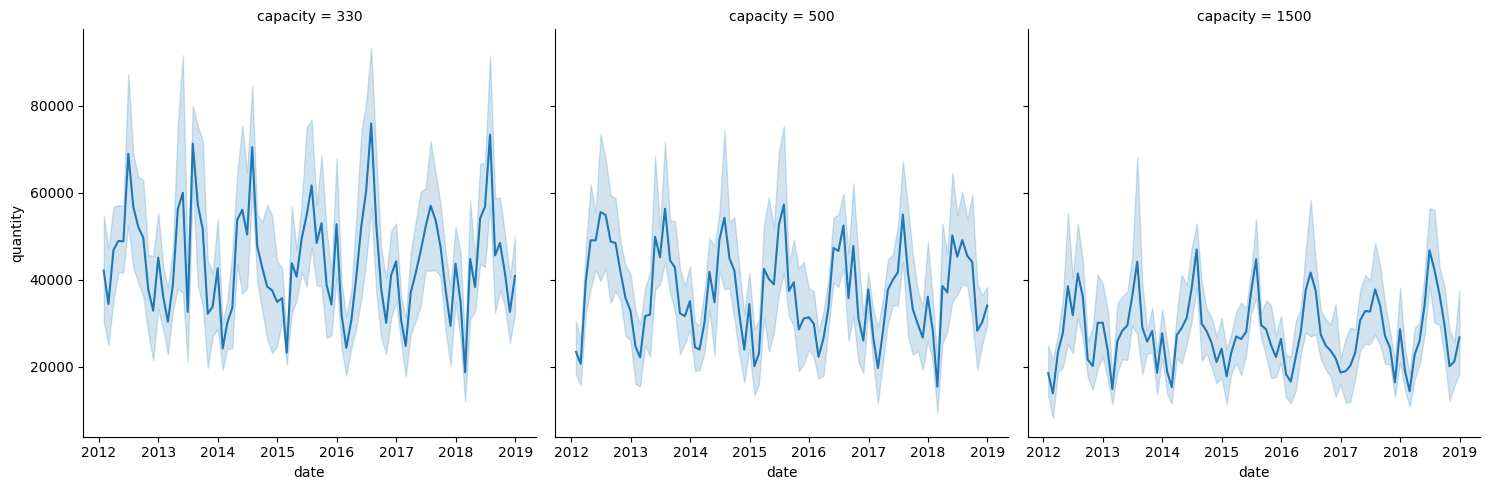

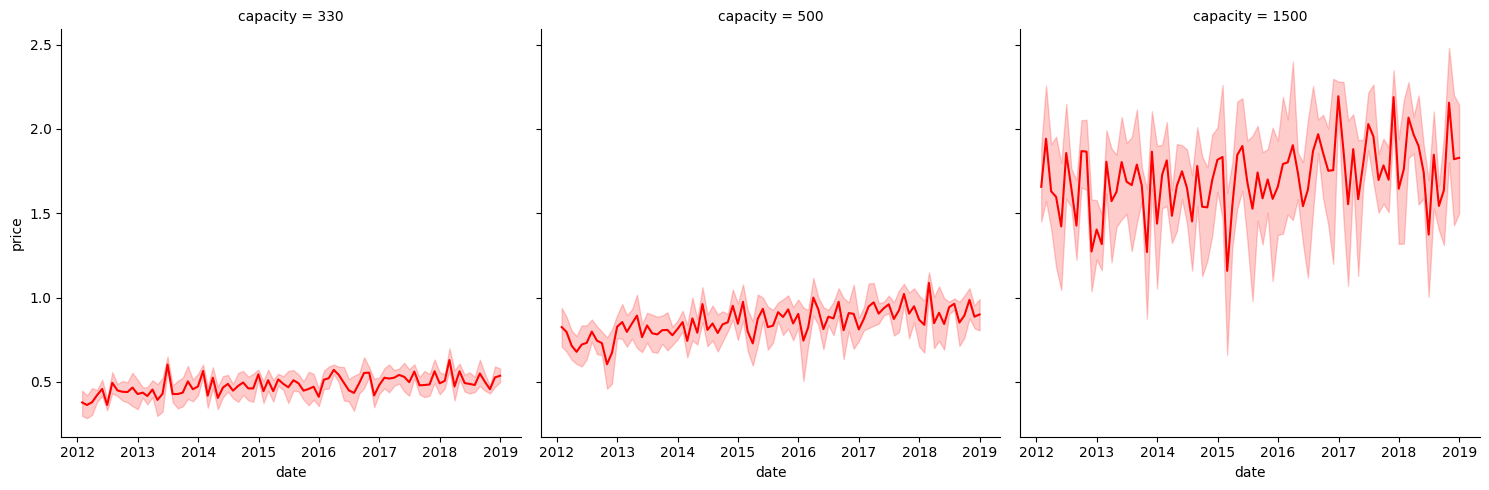

In [ ]:
#Sản lượng tiêu thụ và giá cả theo các dung tích của Orange Power 2012-2018
ax9 = sns.relplot(data = orange_power, x = 'date', y = 'quantity', col = 'capacity', kind = 'line')
ax10 = sns.relplot(data = orange_power, x = 'date', y = 'price', col = 'capacity', kind = 'line', color = 'red')

In [ ]:
#lượng bán của từng loại dung tích sản phẩm qua các năm
quantity_by_cap = df.groupby(['year','capacity'],as_index=False).agg(quantity = ('quantity','sum'))
quantity_by_cap

,year,capacity,quantity
0,2012,330,13155669.0
1,2012,500,11403372.0
2,2012,1500,8250908.0
3,2013,330,13175365.0
4,2013,500,10791674.0
5,2013,1500,8290603.0
6,2014,330,12884396.0
7,2014,500,10702905.0
8,2014,1500,8069507.0
9,2015,330,12711701.0


In [ ]:
#lượng bán của từng loại dung tích sản phẩm qua các năm
table = pd.pivot_table(quantity_by_cap, values ='quantity', index = 'year',
                         columns = 'capacity', aggfunc = np.sum)
table

capacity,330,500,1500
year,,,
2012,13155669.0,11403372.0,8250908.0
2013,13175365.0,10791674.0,8290603.0
2014,12884396.0,10702905.0,8069507.0
2015,12711701.0,10796573.0,8134525.0
2016,12547382.0,10603830.0,8048450.0
2017,12638181.0,10568805.0,7944575.0
2018,12825578.0,10833029.0,8051139.0


#**XÂY DỰNG MÔ HÌNH**

In [ ]:
df_train

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2012-01-31,Athens,shop_1,kinder-cola,glass,500,0.96,13280.0,1,2012
1,2012-01-31,Athens,shop_1,kinder-cola,plastic,1500,2.86,6727.0,1,2012
2,2012-01-31,Athens,shop_1,kinder-cola,can,330,0.87,9848.0,1,2012
3,2012-01-31,Athens,shop_1,adult-cola,glass,500,1.00,20050.0,1,2012
4,2012-01-31,Athens,shop_1,adult-cola,can,330,0.39,25696.0,1,2012
...,...,...,...,...,...,...,...,...,...,...
6475,2017-12-31,Athens,shop_3,orange-power,plastic,1500,1.02,33201.0,12,2017
6476,2017-12-31,Larisa,shop_5,orange-power,can,330,0.47,46971.0,12,2017
6477,2017-12-31,Patra,shop_6,adult-cola,glass,500,1.02,47708.0,12,2017
6478,2017-12-31,Thessaloniki,shop_4,gazoza,plastic,1500,1.34,27115.0,12,2017


In [ ]:
df_test

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2018-01-31,Athens,shop_1,kinder-cola,plastic,1500,3.10,7056,1,2018
1,2018-01-31,Athens,shop_1,kinder-cola,can,330,0.85,12490,1,2018
2,2018-01-31,Athens,shop_1,adult-cola,glass,500,0.83,26640,1,2018
3,2018-01-31,Athens,shop_1,orange-power,glass,500,0.54,41892,1,2018
4,2018-01-31,Athens,shop_1,orange-power,plastic,1500,0.83,22923,1,2018
...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.52,13760,12,2018
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,2.18,16309,12,2018
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.85,24378,12,2018
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.17,20691,12,2018


In [ ]:
#loại bỏ cột date do đã có cột month, year
#loại bỏ cột container do có tương quan hoàn toàn với cột capacity
#loại bỏ cột city do khi dự báo chỉ cần dự báo số lượng cho cột shop là ra số lượng cho cột city
df_train1 = df_train.drop(['date', 'container', 'city'], axis=1)
df_test1 = df_test.drop(['date', 'container', 'city'], axis=1)

In [ ]:
def onehot_encode(df, column):
  df = df.copy()
  dummies = pd.get_dummies(df[column], prefix=column)
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(column, axis=1)
  return df

In [ ]:
#dùng one-hot encoding để mã hóa cho các cột định tính shop và brand
for column in ['shop', 'brand']:
  df_train1 = onehot_encode(df_train1, column=column)
  df_test1 = onehot_encode(df_test1, column=column)

In [ ]:
df_train1

,capacity,price,quantity,month,year,shop_shop_1,shop_shop_2,shop_shop_3,shop_shop_4,shop_shop_5,shop_shop_6,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
0,500,0.96,13280.0,1,2012,1,0,0,0,0,0,0,0,1,0,0
1,1500,2.86,6727.0,1,2012,1,0,0,0,0,0,0,0,1,0,0
2,330,0.87,9848.0,1,2012,1,0,0,0,0,0,0,0,1,0,0
3,500,1.00,20050.0,1,2012,1,0,0,0,0,0,1,0,0,0,0
4,330,0.39,25696.0,1,2012,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,1500,1.02,33201.0,12,2017,0,0,1,0,0,0,0,0,0,0,1
6476,330,0.47,46971.0,12,2017,0,0,0,0,1,0,0,0,0,0,1
6477,500,1.02,47708.0,12,2017,0,0,0,0,0,1,1,0,0,0,0
6478,1500,1.34,27115.0,12,2017,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_test1

,capacity,price,quantity,month,year,shop_shop_1,shop_shop_2,shop_shop_3,shop_shop_4,shop_shop_5,shop_shop_6,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
0,1500,3.10,7056,1,2018,1,0,0,0,0,0,0,0,1,0,0
1,330,0.85,12490,1,2018,1,0,0,0,0,0,0,0,1,0,0
2,500,0.83,26640,1,2018,1,0,0,0,0,0,1,0,0,0,0
3,500,0.54,41892,1,2018,1,0,0,0,0,0,0,0,0,0,1
4,1500,0.83,22923,1,2018,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1500,2.52,13760,12,2018,1,0,0,0,0,0,0,0,1,0,0
1076,1500,2.18,16309,12,2018,1,0,0,0,0,0,0,0,0,0,1
1077,330,0.85,24378,12,2018,0,0,0,0,0,1,0,0,1,0,0
1078,1500,2.17,20691,12,2018,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
def split(df):
  df = df.copy()
  X = df.drop('quantity', axis=1)
  y = df['quantity']  
  return X, y

In [ ]:
X_train,y_train = split(df_train1)
X_test,y_test = split(df_test1)

In [ ]:
#dùng min-max scaler để chuẩn hóa dữ liệu
scaler = preprocessing.MinMaxScaler()

In [ ]:
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled

,capacity,price,month,year,shop_shop_1,shop_shop_2,shop_shop_3,shop_shop_4,shop_shop_5,shop_shop_6,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
0,0.145299,0.191874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.620767,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.171558,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.145299,0.200903,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.063205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,1.000000,0.205418,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6476,0.000000,0.081264,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6477,0.145299,0.205418,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6478,1.000000,0.277652,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train

0       13280.0
1        6727.0
2        9848.0
3       20050.0
4       25696.0
         ...   
6475    33201.0
6476    46971.0
6477    47708.0
6478    27115.0
6479    30413.0
Name: quantity, Length: 6480, dtype: float64

In [ ]:
X_test_scaled

,capacity,price,month,year,shop_shop_1,shop_shop_2,shop_shop_3,shop_shop_4,shop_shop_5,shop_shop_6,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
0,1.000000,0.674944,0.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.167043,0.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.145299,0.162528,0.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.145299,0.097065,0.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.162528,0.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.000000,0.544018,1.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1076,1.000000,0.467269,1.0,1.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077,0.000000,0.167043,1.0,1.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1078,1.000000,0.465011,1.0,1.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

0        7056
1       12490
2       26640
3       41892
4       22923
        ...  
1075    13760
1076    16309
1077    24378
1078    20691
1079    24615
Name: quantity, Length: 1080, dtype: int64

**Tương quan**

In [ ]:
#Price vs Quantity
pearson_coef, p_value = stats.pearsonr(X_train['price'], y_train)
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is -0.5186853439180865  while P-value is  0.0


In [ ]:
#Capacity vs Quantity
pearson_coef, p_value = stats.pearsonr(X_train['capacity'], y_train)
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is -0.2862186846623415  while P-value is  2.0278824973696028e-122


In [ ]:
#Capacity vs Price
pearson_coef, p_value = stats.pearsonr(X_train['capacity'], X_train['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.7656023459672924  while P-value is  0.0


**Chạy mô hình**

In [ ]:
model1= LinearRegression()
model1.fit(X_train_scaled, y_train)
model1.score(X_test_scaled, y_test)

0.5393800922650385

In [ ]:
model2= DecisionTreeRegressor()
model2.fit(X_train_scaled, y_train)
model2.score(X_test_scaled, y_test)

0.8188726473202691

In [ ]:
model3=RandomForestRegressor()
model3.fit(X_train_scaled, y_train)
model3.score(X_test_scaled, y_test)

0.9234340993713428

In [ ]:
model3.score(X_train_scaled, y_train)

0.9915386918580055

In [ ]:
model4=GradientBoostingRegressor()
model4.fit(X_train_scaled, y_train)
model4.score(X_test_scaled, y_test)

0.8790988976352038

In [ ]:
model5 = XGBRegressor()
model5.fit(X_train_scaled, y_train)
model5.score(X_test_scaled, y_test)

0.9599496546863111

In [ ]:
model5.score(X_train_scaled, y_train)

0.9897248053926209

In [ ]:
#sản lượng tiêu thụ dự đoán với mô hình Random Forest
y_test_pred = model3.predict(X_test_scaled)

In [ ]:
y_test_pred

array([ 6646.63, 10882.15, 22590.6 , ..., 23906.61, 19814.43, 23296.79])

In [ ]:
#đánh giá mô hình Random Forest
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
mape = np.mean(np.abs(y_test - y_test_pred) / np.abs(y_test))

print ("Mean Absolute Error: ", mae)
print ("Root Mean Squared Error: ", math.sqrt(mse))
print ("Mean Absolute Percentage Error: ", 100 * mape, '%')
print ("r2: ", model3.score(X_test_scaled,y_test))

Mean Absolute Error:  2986.6876388888886
Root Mean Squared Error:  4475.722977289742
Mean Absolute Percentage Error:  10.519528156946349 %
r2:  0.9234340993713428


RMSE: Biên độ giao động của giá trị dự báo xung quanh giá trị thực tế là 4476.

MAE: Trung bình sai số giữa giá trị dự báo và giá trị thực tế là 2987.

MAPE: Sai số giữa giá trị dự báo so với giá trị thực tế bằng 10,52% giá trị thực tế.

In [ ]:
#sản lượng tiêu thụ dự đoán với mô hình Extreme Gradient Boosting
y_test_pred_5 = model5.predict(X_test_scaled)

In [ ]:
#đánh giá mô hình Extreme Gradient Boosting
mae = metrics.mean_absolute_error(y_test, y_test_pred_5)
mse = metrics.mean_squared_error(y_test, y_test_pred_5)
mape = np.mean(np.abs(y_test - y_test_pred_5) / np.abs(y_test))

print ("Mean Absolute Error: ", mae)
print ("Root Mean Squared Error: ", math.sqrt(mse))
print ("Mean Absolute Percentage Error: ", 100 * mape, '%')
print ("r2: ", model5.score(X_test_scaled,y_test))

Mean Absolute Error:  2316.6775560167102
Root Mean Squared Error:  3237.0442261763983
Mean Absolute Percentage Error:  8.56381512070131 %
r2:  0.9599496546863111


RMSE: Biên độ giao động của giá trị dự báo xung quanh giá trị thực tế là 3237.

MAE: Trung bình sai số giữa giá trị dự báo và giá trị thực tế là 2317.

MAPE: Sai số giữa giá trị dự báo so với giá trị thực tế bằng 8,56% giá trị thực tế.

In [ ]:
#feature importances với mô hình XGBoosting
importances = model5.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f'{feature}: {importance}')
# Find the most important feature
most_important_feature = X_train.columns[importances.argmax()]
print(f'\nThe most important feature is: {most_important_feature}')

capacity: 0.05758342519402504
price: 0.09723791480064392
month: 0.05291703715920448
year: 0.005368654616177082
shop_shop_1: 0.009819845668971539
shop_shop_2: 0.04162365570664406
shop_shop_3: 0.05000005662441254
shop_shop_4: 0.06448598951101303
shop_shop_5: 0.026459790766239166
shop_shop_6: 0.26023316383361816
brand_adult-cola: 0.030927695333957672
brand_gazoza: 0.05826910212635994
brand_kinder-cola: 0.11216114461421967
brand_lemon-boost: 0.10694971680641174
brand_orange-power: 0.025962790474295616

The most important feature is: shop_shop_6


In [ ]:
y_test_pred_5 = pd.DataFrame(y_test_pred_5, index = y_test.index, columns=['Prediction'])
y_test_pred_5

,Prediction
0,7027.429688
1,11381.844727
2,19610.076172
3,34395.480469
4,29509.500000
...,...
1075,13984.510742
1076,15493.524414
1077,23438.093750
1078,24651.058594


**Check lại kết quả**

In [ ]:
#bảng thể hiện lượng tiêu thụ thực tế và dự đoán của năm 2018
actual_and_predict_2018 = pd.concat([df_test, y_test_pred_5], axis=1)
actual_and_predict_2018

,date,city,shop,brand,container,capacity,price,quantity,month,year,Prediction
0,2018-01-31,Athens,shop_1,kinder-cola,plastic,1500,3.10,7056,1,2018,7027.429688
1,2018-01-31,Athens,shop_1,kinder-cola,can,330,0.85,12490,1,2018,11381.844727
2,2018-01-31,Athens,shop_1,adult-cola,glass,500,0.83,26640,1,2018,19610.076172
3,2018-01-31,Athens,shop_1,orange-power,glass,500,0.54,41892,1,2018,34395.480469
4,2018-01-31,Athens,shop_1,orange-power,plastic,1500,0.83,22923,1,2018,29509.500000
...,...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.52,13760,12,2018,13984.510742
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,2.18,16309,12,2018,15493.524414
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.85,24378,12,2018,23438.093750
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.17,20691,12,2018,24651.058594


In [ ]:
#chênh lệch tổng sản lượng năm 2018 giữa dự đoán và thực tế
print(actual_and_predict_2018.quantity.sum())
print(actual_and_predict_2018.Prediction.sum())
print((actual_and_predict_2018.Prediction.sum() - actual_and_predict_2018.quantity.sum())/actual_and_predict_2018.quantity.sum())

31709746
30859056.0
-0.026827398743591323


In [ ]:
#xem chênh lệch giữa sản lượng dự đoán và thực tế của năm 2018 của các thành phố, shop, brand
f = pd.DataFrame(actual_and_predict_2018.groupby(['city','shop','brand'], axis =0, as_index=True).agg(quantity = ('quantity','sum'), prediction = ('Prediction','sum')))
f['Chênh lệch'] = f['prediction'] - f['quantity']
f['Tỷ lệ CL(%)'] = (f['Chênh lệch']/f['quantity'])*100
f

quantity    prediction   Chênh lệch  \
city         shop   brand                                               
Athens       shop_1 adult-cola      910368  9.041856e+05  -6182.37500   
                    gazoza         1257792  1.220147e+06 -37644.75000   
                    kinder-cola     546109  5.154398e+05 -30669.18750   
                    lemon-boost     738731  7.247943e+05 -13936.68750   
                    orange-power   1240788  1.172368e+06 -68420.50000   
             shop_3 adult-cola      718157  7.221928e+05   4035.75000   
                    gazoza         1019414  9.638252e+05 -55588.75000   
                    kinder-cola     487055  4.929961e+05   5941.06250   
                    lemon-boost     620518  6.057831e+05 -14734.87500   
                    orange-power    930147  9.208719e+05  -9275.06250   
Irakleion    shop_2 adult-cola     1113389  1.074903e+06 -38486.12500   
                    gazoza         1558179  1.499950e+06 -58229.12500   
                    kinder-cola     682046  6.611383e+05 -20907.68750   
                    lemon-boost     990441  9.707327e+05 -19708.31250   
                    orange-power   1422288  1.347221e+06 -75066.75000   
Larisa       shop_5 adult-cola      818661  8.126148e+05  -6046.25000   
                    gazoza         1099766  1.059004e+06 -40762.00000   
                    kinder-cola     492575  4.848284e+05  -7746.59375   
                    lemon-boost     709639  7.065309e+05  -3108.12500   
                    orange-power   1007381  9.800968e+05 -27284.18750   
Patra        shop_6 adult-cola     1491915  1.479969e+06 -11946.37500   
                    gazoza         1975484  1.939684e+06 -35800.00000   
                    kinder-cola     949082  9.553396e+05   6257.62500   
                    lemon-boost    1230628  1.216505e+06 -14122.87500   
                    orange-power   1821317  1.755258e+06 -66058.75000   
Thessaloniki shop_4 adult-cola     1144295  1.102833e+06 -41461.75000   
                    gazoza         1554638  1.498094e+06 -56544.37500   
                    kinder-cola     703103  6.931061e+05  -9996.93750   
                    lemon-boost    1010277  9.825280e+05 -27749.00000   
                    orange-power   1465563  1.396117e+06 -69445.87500   

                                  Tỷ lệ CL(%)  
city         shop   brand                      
Athens       shop_1 adult-cola      -0.679107  
                    gazoza          -2.992923  
                    kinder-cola     -5.615946  
                    lemon-boost     -1.886571  
                    orange-power    -5.514278  
             shop_3 adult-cola       0.561959  
                    gazoza          -5.453010  
                    kinder-cola      1.219793  
                    lemon-boost     -2.374609  
                    orange-power    -0.997161  
Irakleion    shop_2 adult-cola      -3.456665  
                    gazoza          -3.736998  
                    kinder-cola     -3.065437  
                    lemon-boost     -1.989852  
                    orange-power    -5.277887  
Larisa       shop_5 adult-cola      -0.738554  
                    gazoza          -3.706425  
                    kinder-cola     -1.572673  
                    lemon-boost     -0.437987  
                    orange-power    -2.708428  
Patra        shop_6 adult-cola      -0.800741  
                    gazoza          -1.812214  
                    kinder-cola      0.659334  
                    lemon-boost     -1.147615  
                    orange-power    -3.626977  
Thessaloniki shop_4 adult-cola      -3.623345  
                    gazoza          -3.637141  
                    kinder-cola     -1.421831  
                    lemon-boost     -2.746672  
                    orange-power    -4.738512

Nhận thấy chênh lệch không vượt quá 5,62% --> chấp nhận được

In [ ]:
#xem chênh lệch giữa sản lượng dự đoán và thực tế của năm 2018 theo từng loại sản phẩm
capacity_f = actual_and_predict_2018.groupby(['capacity','brand'],as_index=True).agg(quantity = ('quantity','sum'), prediction = ('Prediction','sum'))
capacity_f['Chênh lệch'] = capacity_f['prediction'] - capacity_f['quantity']
capacity_f['Tỷ lệ CL(%)'] = (capacity_f['Chênh lệch']/capacity_f['quantity'])*100
capacity_f

quantity    prediction   Chênh lệch  Tỷ lệ CL(%)
capacity brand                                                         
330      adult-cola     2463839  2.445100e+06  -18738.7500    -0.760551
         gazoza         3441123  3.336088e+06 -105034.7500    -3.052339
         kinder-cola    1585891  1.547843e+06  -38048.3750    -2.399180
         lemon-boost    2156197  2.094874e+06  -61322.6250    -2.844018
         orange-power   3178528  3.043272e+06 -135255.7500    -4.255295
500      adult-cola     2145749  2.070241e+06  -75507.8750    -3.518952
         gazoza         2909541  2.786148e+06 -123393.0000    -4.240978
         kinder-cola    1299053  1.306364e+06    7311.0000     0.562795
         lemon-boost    1804493  1.790147e+06  -14345.8750    -0.795009
         orange-power   2674193  2.550524e+06 -123669.0000    -4.624535
1500     adult-cola     1587197  1.581356e+06   -5840.5000    -0.367976
         gazoza         2114609  2.058468e+06  -56141.3750    -2.654929
         kinder-cola     975026  9.486416e+05  -26384.4375    -2.706024
         lemon-boost    1339544  1.321853e+06  -17691.2500    -1.320692
         orange-power   2034763  1.978137e+06  -56626.3750    -2.782947

Nhận thấy chênh lệch không vượt quá 4,62% --> chấp nhận được

#**Dự báo cho năm 2019**

Text(0.5, 1.0, 'Biến động giá năm 2012 - 2018')

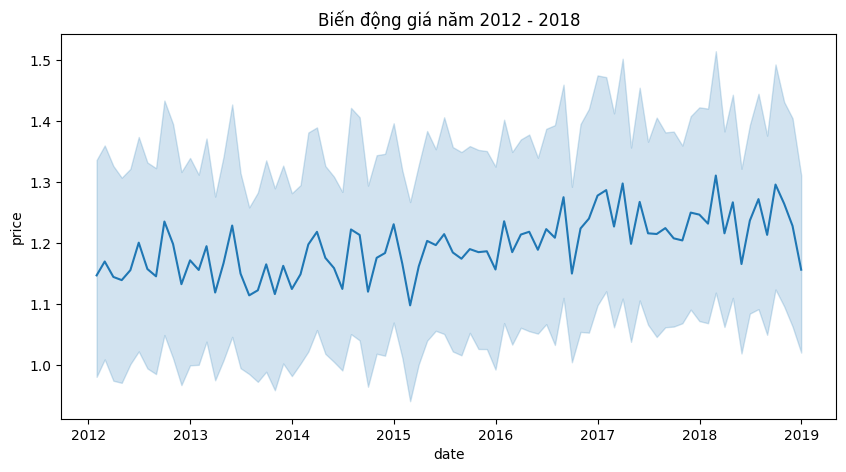

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.lineplot(x = df.date, y = df.price)
plt.title("Biến động giá năm 2012 - 2018")

Kết hợp với biểu đồ biến động giá theo từng loại sản phẩm (nhãn hàng + dung tích), có thế thấy biến động giá không có tính chu kỳ

In [ ]:
df

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2012-01-31,Athens,shop_1,kinder-cola,glass,500,0.96,13280.0,1,2012
1,2012-01-31,Athens,shop_1,kinder-cola,plastic,1500,2.86,6727.0,1,2012
2,2012-01-31,Athens,shop_1,kinder-cola,can,330,0.87,9848.0,1,2012
3,2012-01-31,Athens,shop_1,adult-cola,glass,500,1.00,20050.0,1,2012
4,2012-01-31,Athens,shop_1,adult-cola,can,330,0.39,25696.0,1,2012
...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.52,13760.0,12,2018
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,2.18,16309.0,12,2018
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.85,24378.0,12,2018
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.17,20691.0,12,2018


In [ ]:
#xác định giá TB của từng loại sp từ năm 2012 - 2018 để áp giá cho năm 2019, làm cơ sở dự báo sản lượng 2019
for i in df.brand.unique():
  for j in df.capacity.unique():
    print('Giá TB từ năm 2012 - 2018 của '+ str(i) +' dung tích '+str(j)+'ml là: ', df['price'].loc[(df['brand'] == i) & (df['capacity'] == j)].mean())

Giá TB từ năm 2012 - 2018 của kinder-cola dung tích 500ml là:  1.2798611111111111
Giá TB từ năm 2012 - 2018 của kinder-cola dung tích 1500ml là:  2.9847817460317465
Giá TB từ năm 2012 - 2018 của kinder-cola dung tích 330ml là:  0.7606746031746031
Giá TB từ năm 2012 - 2018 của adult-cola dung tích 500ml là:  1.1181349206349205
Giá TB từ năm 2012 - 2018 của adult-cola dung tích 1500ml là:  2.5015674603174602
Giá TB từ năm 2012 - 2018 của adult-cola dung tích 330ml là:  0.655297619047619
Giá TB từ năm 2012 - 2018 của orange-power dung tích 500ml là:  0.8546825396825397
Giá TB từ năm 2012 - 2018 của orange-power dung tích 1500ml là:  1.7129960317460315
Giá TB từ năm 2012 - 2018 của orange-power dung tích 330ml là:  0.4810912698412698
Giá TB từ năm 2012 - 2018 của gazoza dung tích 500ml là:  0.6417261904761905
Giá TB từ năm 2012 - 2018 của gazoza dung tích 1500ml là:  1.0722420634920635
Giá TB từ năm 2012 - 2018 của gazoza dung tích 330ml là:  0.34021825396825395
Giá TB từ năm 2012 - 2018 c

In [ ]:
df_predict_2019 = df_test.copy()
df_predict_2019

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2018-01-31,Athens,shop_1,kinder-cola,plastic,1500,3.10,7056,1,2018
1,2018-01-31,Athens,shop_1,kinder-cola,can,330,0.85,12490,1,2018
2,2018-01-31,Athens,shop_1,adult-cola,glass,500,0.83,26640,1,2018
3,2018-01-31,Athens,shop_1,orange-power,glass,500,0.54,41892,1,2018
4,2018-01-31,Athens,shop_1,orange-power,plastic,1500,0.83,22923,1,2018
...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.52,13760,12,2018
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,2.18,16309,12,2018
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.85,24378,12,2018
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.17,20691,12,2018


In [ ]:
#Thay thế giá của các loại mặt hàng năm 2019 bằng giá TB từ năm 2012 - 2018 của các loại mặt hàng
for i in df.brand.unique():
  for j in df.capacity.unique():
    df_predict_2019.price[(df_predict_2019['brand'] == i) & (df_predict_2019['capacity'] == j)] = df['price'].loc[(df['brand'] == i) & (df['capacity'] == j)].mean()

<ipython-input-184-9205450636a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_2019.price[(df_predict_2019['brand'] == i) & (df_predict_2019['capacity'] == j)] = df['price'].loc[(df['brand'] == i) & (df['capacity'] == j)].mean()


In [ ]:
#thay thế năm dự đoán thành 2019
df_predict_2019.year = df_predict_2019.year.replace(2018,2019)

In [ ]:
df_predict_2019

,date,city,shop,brand,container,capacity,price,quantity,month,year
0,2018-01-31,Athens,shop_1,kinder-cola,plastic,1500,2.984782,7056,1,2019
1,2018-01-31,Athens,shop_1,kinder-cola,can,330,0.760675,12490,1,2019
2,2018-01-31,Athens,shop_1,adult-cola,glass,500,1.118135,26640,1,2019
3,2018-01-31,Athens,shop_1,orange-power,glass,500,0.854683,41892,1,2019
4,2018-01-31,Athens,shop_1,orange-power,plastic,1500,1.712996,22923,1,2019
...,...,...,...,...,...,...,...,...,...,...
1075,2018-12-31,Athens,shop_1,kinder-cola,plastic,1500,2.984782,13760,12,2019
1076,2018-12-31,Athens,shop_1,orange-power,plastic,1500,1.712996,16309,12,2019
1077,2018-12-31,Patra,shop_6,kinder-cola,can,330,0.760675,24378,12,2019
1078,2018-12-31,Thessaloniki,shop_4,adult-cola,plastic,1500,2.501567,20691,12,2019


In [ ]:
df_predict_2019_1 = df_predict_2019.drop(['date', 'container', 'city'], axis=1)

In [ ]:
for column in ['shop', 'brand']:
  df_predict_2019_1 = onehot_encode(df_predict_2019_1 , column=column)

In [ ]:
X,y = split(df_predict_2019_1)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [ ]:
X_scaled

,capacity,price,month,year,shop_shop_1,shop_shop_2,shop_shop_3,shop_shop_4,shop_shop_5,shop_shop_6,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
0,1.000000,0.648935,0.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.146879,0.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.145299,0.227570,0.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.145299,0.168100,0.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.361850,0.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.000000,0.648935,1.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1076,1.000000,0.361850,1.0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077,0.000000,0.146879,1.0,1.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1078,1.000000,0.539857,1.0,1.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#sản lượng năm 2019 được dự đoán bằng mô hình XGBoosting ở trên
y_2019_pred = model5.predict(X_scaled)

In [ ]:
y_2019_pred = pd.DataFrame(y_2019_pred, index = y.index, columns=['quantity_2019_Prediction'])
y_2019_pred

,quantity_2019_Prediction
0,7500.781250
1,12748.203125
2,18243.240234
3,25108.042969
4,16998.753906
...,...
1075,12443.382812
1076,22270.658203
1077,28058.896484
1078,20104.822266


In [ ]:
#chênh lệch tổng sản lượng dự đoán năm 2019 và tổng sản lượng thực tế năm 2018
print(actual_and_predict_2018.quantity.sum())
print(y_2019_pred['quantity_2019_Prediction'].sum())
print((y_2019_pred['quantity_2019_Prediction'].sum() - actual_and_predict_2018.quantity.sum())/actual_and_predict_2018.quantity.sum())

31709746
33338726.0
0.05137158777619978


Tổng sản lượng dự đoán năm 2019 tăng 5,13% so với tổng sản lượng thực tế năm 2018, khá phù hợp

In [ ]:
#bảng dự đoán năm 2019 theo từng city, shop, brand, capacity, month
df_predict_2019 = pd.concat([df_predict_2019, y_2019_pred], axis=1)
df_predict_2019 = df_predict_2019.drop(['date', 'quantity'], axis=1)
df_predict_2019.quantity_2019_Prediction = df_predict_2019.quantity_2019_Prediction.round()
df_predict_2019

,city,shop,brand,container,capacity,price,month,year,quantity_2019_Prediction
0,Athens,shop_1,kinder-cola,plastic,1500,2.984782,1,2019,7501.0
1,Athens,shop_1,kinder-cola,can,330,0.760675,1,2019,12748.0
2,Athens,shop_1,adult-cola,glass,500,1.118135,1,2019,18243.0
3,Athens,shop_1,orange-power,glass,500,0.854683,1,2019,25108.0
4,Athens,shop_1,orange-power,plastic,1500,1.712996,1,2019,16999.0
...,...,...,...,...,...,...,...,...,...
1075,Athens,shop_1,kinder-cola,plastic,1500,2.984782,12,2019,12443.0
1076,Athens,shop_1,orange-power,plastic,1500,1.712996,12,2019,22271.0
1077,Patra,shop_6,kinder-cola,can,330,0.760675,12,2019,28059.0
1078,Thessaloniki,shop_4,adult-cola,plastic,1500,2.501567,12,2019,20105.0
